# 확률적 경사 하강법
* 확률적 경사 하강법에서 확률적이란 말은 무작위하게 혹은 랜덤하게의 기술적인 표현입니다. 
* 경사는 기울기를 의미합니다. 
* 하강법은 내려가는 방법입니다. 

* 산에서 내려온다고 생각해본다면 등산로 입구까지 내려가야 하는데 가장 빠른 길은 경사가 가장 가파른 길! 
* 이 개념이 경사 하강법의 개념 

* 아래 그림처럼 내려오는 보폭이 너무 크면 원하는 지점을 지나쳐 갈수 있음 

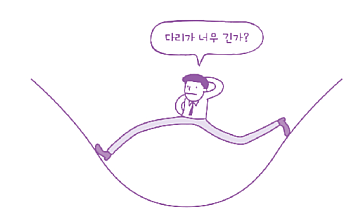

* 확률적이라는 말은 실제로는 훈련 데이터 셋을 사용해 모델을 훈련하기 때문에 경사 하강법도 당연히 훈련 세트를 사용하여 가장 가파른 길을 찾을 것
* 그런데 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾는 것이 확률적 경사 하강법
* 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려갑니다. 그 다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려갑니다. 
* 이런 식으로 전체 샘플을 모두 사용할 때까지 계속합니다. 
* 이렇게 해서 답을 찾지 못하면 다시 처음부터 시작합니다. 그 다음 다시 랜덤하게 하나의 샘플을 선택해 이어서 경사를 내려갑니다. 
* 확률적 경사 하강법에서 훈련 세트를 한번 모두 사용하는 과정을 에포크(epoch)라고 부릅니다. 
-------------
* 1개의 데이터셋을 사용하여 내려오는 것보다 여러 개를 한꺼번에 묶어서 사용하면 시간이 더 절약될 것입니다. 이 아이디어가 미니배치 경사 하강법(minibatch gradient descent)이라고 합니다. 
* 반대로 전체 샘플을 사용하여 진행하는 것을 배치 경사 하강법이라고 합니다. 
    * 컴퓨터의 제약등으로 인해서 잘 사용하지 않습니다. 

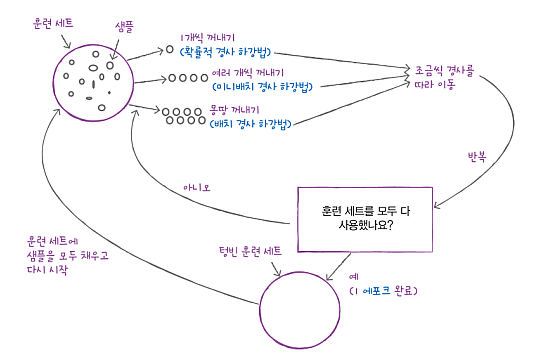

# 손실함수
* loss(cost) function는 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준 
* 값은 작을수록 좋지만 어떤 값이 최솟값인지는 알지 못함 
* 가능한 많이 찾아보고 만족할만한 수준이라면 산에서 다 내려왔다고 인정해야 합니다. 
    * 손실 함수는 샘플 하나에 대한 손실을 정의하고 
    * 비용 함수는 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합을 의미 
    * 손실 함수, 비용 함수 용어는 구분하지 않고 섞어서 사용합니다. 

## 로지스틱 손실 함수

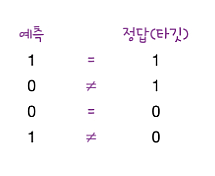

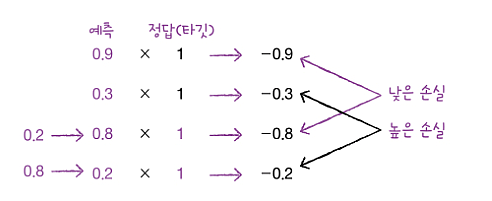

* 예측 확률에 로그 함수를 적용하면 더 좋습니다. 예측 확률의 범위는 0 ~ 1 사이인데 로그 함수는 이 사이에서 음수가 되므로 최종 손실 값은 양수가 됩니다. 
* 손실이 양수가 되면 이해하기 더 쉽습니다. 또 로그 함수는 0에 가까울수록 아주 큰 음수가 되기 때문에 손실을 아주 크게 만들어 모델에 큰 영향을 미칠수 있습니다. 

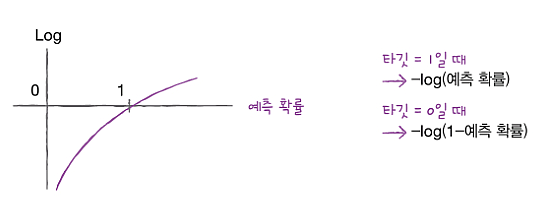

* 이 손실 함수를 로지스틱 손실 함수 또는 이진 크로스엔트로피 손실 함수라고 부릅니다. 
* 다중 분류에서 사용하는 손실 함수를 크로스엔트로피 손실 함수라고 부릅니다. 

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## SGDClassifier

In [4]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')

In [5]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [6]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

# 표준화가 언제 필요한걸까 대체
# https://bskyvision.com/849
ss = StandardScaler()

ss.fit(train_input)

# y값에 영향을 주는 특성들을 스케일링 함
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
from sklearn.linear_model import SGDClassifier

In [10]:
sc = SGDClassifier(loss='log', max_iter=1000, random_state=42)

# train_scaled = x (특성값들), train_target = y (정답)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.8


In [11]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.907563025210084
0.925


## 에포크와 과대/과소적합

In [12]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

# tarin_target = 훈련 데이터의 y값
classes = np.unique(train_target)

In [13]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

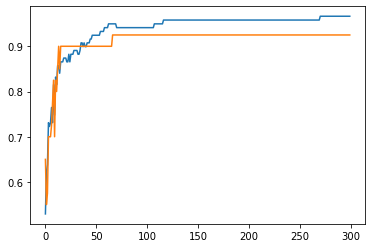

In [14]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [15]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [16]:
help(SGDClassifier)

Help on class SGDClassifier in module sklearn.linear_model._stochastic_gradient:

class SGDClassifier(BaseSGDClassifier)
 |  SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
 |  
 |  Linear classifiers (SVM, logistic regression, etc.) with SGD training.
 |  
 |  This estimator implements regularized linear models with stochastic
 |  gradient descent (SGD) learning: the gradient of the loss is estimated
 |  each sample at a time and the model is updated along the way with a
 |  decreasing strength schedule (aka learning rate). SGD allows minibatch
 |  (online/out-of-core) learning via the `partial_fit` method.
 |  For best results using the default learning rate schedule, the data sho

In [17]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


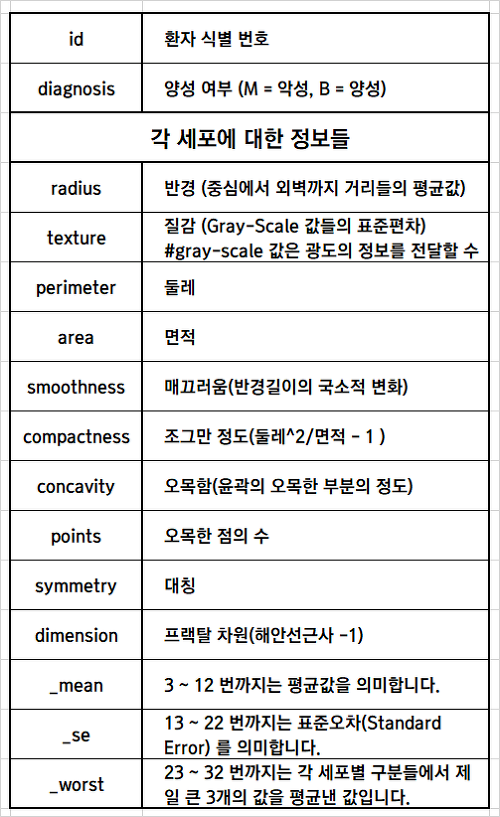